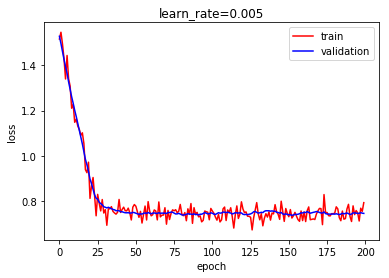

In [17]:
import numpy as np
from numpy import random,mat
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

class classify(object):
    def __init__(self):
        self.W=None
        self.b=None
        self.batch_size=None
        
    def loss(self, X, y,X_validate,y_validate,c):
        n_train=X.shape[0]/self.batch_size
        i= random.randint(0,n_train-2)
        index=self.batch_size*i
        
        X_train=X[index:index+self.batch_size]
        y_train=y[index:index+self.batch_size]
        
        loss_train=0
        loss_validate=0
        for i in xrange(X_validate.shape[0]):
            var=self.predict(X_validate[i])-y_validate[i]+1
            loss_validate+=var[0] if var>0 else 0
        for i in xrange(X_train.shape[0]):
            var=self.predict(X_train[i])-y_train[i]+1
            loss_train+=var if var>0 else 0
        loss_validate=loss_validate/X_validate.shape[0]
        loss_train=loss_train/X_train.shape[0]
        
        dW=self.W.copy()
        for i in xrange(X_train.shape[0]):
            add=1 - y_train[i]*self.predict(X_train[i]) #1-yi*ypredict
            add_W= -c*X_train[i]*y_train[i][0]
            add_W=add_W.reshape(add_W.shape[0],1)
            dW+=c*add_W if add>0 else 0
        return loss_train,loss_validate,dW
 
    def train(self,X,y,X_validate,y_validate,learn_rate=0.005,iters=200, batch_size=256,c=0.1):
        
        num_feature=X.shape[1] 
        num_train=X.shape[0] 
        self.batch_size = batch_size
        self.W=np.zeros((num_feature,1))
        loss_list_train = []
        loss_list_validate=[]
        
        for i in xrange(iters):
            loss_train,loss_validate,dW= self.loss(X, y,X_validate,y_validate,c)
            loss_list_train.append(loss_train)
            loss_list_validate.append(loss_validate)
            self.W+=-dW*learn_rate
        return loss_list_train,loss_list_validate
    
    def predict(self,X):
        return X.dot(self.W)
    pass

# 读取数据集
X_train,y_train=datasets.load_svmlight_file('/Users/taohuadao/Documents/机器学习temp/a9a',n_features=124,length=32561*125)
X_validate,y_validate=datasets.load_svmlight_file('/Users/taohuadao/Documents/机器学习temp/a9a.t',n_features=124,length=32561*125)
X_train=X_train.toarray()
X_validate=X_validate.toarray()
y_train=y_train.reshape(y_train.shape[0],1)
y_validate=y_validate.reshape(y_validate.shape[0],1)


classification=classify()
loss_list_train,loss_list_validate=classification.train(X_train, y_train,X_validate,y_validate)

iters = np.arange(0, 200)
plt.plot(iters,loss_list_train,color="r",label="train")
plt.plot(iters,loss_list_validate,color="b",label="validation")
plt.title('learn_rate=0.005')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

